In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
from nba_py.team import TeamYearOverYearSplits, TeamList
team_list = TeamList().info().head(30)

In [51]:
rockets = TeamYearOverYearSplits(1610612745).by_year()
rockets.head(1)

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,By Year,2017-18,71,57,14,0.803,48.1,39.0,84.1,0.463,...,3,3,11,6,7,7,2,1,210,2017-18


In [3]:
season_team = {}
for team in team_list['TEAM_ID']:
    df = TeamYearOverYearSplits(team,season_type='Playoffs').by_year()
    for index, row in df.iterrows():
        season_data =  season_team.get(row['GROUP_VALUE'])
        if season_data:
            if team not in season_team[row['GROUP_VALUE']]:
                season_team[row['GROUP_VALUE']].append(team)
        else:
            season_team[row['GROUP_VALUE']] = [team]
    time.sleep(2)

In [5]:
def playoff_team(team_id, season):
    if team_id in season_team[season]:
        return 1
    return 0

In [24]:
all_team_data = pd.DataFrame()
for team in team_list['TEAM_ID']:
    team_data = TeamYearOverYearSplits(team,measure_type = 'Advanced').by_year()
    team_data['PLAYOFFS'] = team_data.apply(lambda row: playoff_team(team,row['GROUP_VALUE']),axis=1)
    all_team_data = pd.concat([all_team_data,team_data])
    time.sleep(2)

In [14]:
all_team_data = pd.DataFrame()
for team in team_list['TEAM_ID']:
    team_data = TeamYearOverYearSplits(team).by_year()
    team_data['PLAYOFFS'] = team_data.apply(lambda row: playoff_team(team,row['GROUP_VALUE']),axis=1)
    all_team_data = pd.concat([all_team_data,team_data])
    time.sleep(2)

In [3]:
regular_stats = pd.read_csv('all_team_playoffs.csv')
advs_stats = pd.read_csv('all_team_playoffs_adv.csv')

In [4]:
regular_features = regular_stats[['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS']]

In [5]:
advs_features = advs_stats[['NET_RATING', 'AST_PCT', 'AST_TO',
       'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT',
       'TS_PCT', 'PACE', 'PIE']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(regular_features, regular_stats['PLAYOFFS'], test_size=0.30, random_state=169)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
regular_model = LogisticRegression()
regular_model.fit(X_train, y_train)
predictions = regular_model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.90      0.88        87
          1       0.91      0.88      0.90       109

avg / total       0.89      0.89      0.89       196



In [8]:
from sklearn.svm import LinearSVC
regular_svc_model = LinearSVC()
regular_svc_model.fit(X_train, y_train)
predictions = regular_svc_model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.62      0.98      0.76        87
          1       0.97      0.53      0.69       109

avg / total       0.82      0.73      0.72       196



In [19]:
from sklearn.ensemble import RandomForestClassifier
regular_rf = RandomForestClassifier(n_estimators=100)
regular_rf.fit(X_train,y_train)
predictions = regular_rf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.82      0.86        91
          1       0.86      0.91      0.88       105

avg / total       0.87      0.87      0.87       196



In [21]:
regular_rf.predict_proba(X_test)

array([[ 0.62,  0.38],
       [ 0.98,  0.02],
       [ 0.13,  0.87],
       [ 0.73,  0.27],
       [ 0.22,  0.78],
       [ 0.22,  0.78],
       [ 0.39,  0.61],
       [ 0.85,  0.15],
       [ 0.04,  0.96],
       [ 0.39,  0.61],
       [ 0.16,  0.84],
       [ 0.41,  0.59],
       [ 0.05,  0.95],
       [ 0.79,  0.21],
       [ 0.89,  0.11],
       [ 0.35,  0.65],
       [ 0.66,  0.34],
       [ 0.35,  0.65],
       [ 0.1 ,  0.9 ],
       [ 0.95,  0.05],
       [ 0.82,  0.18],
       [ 0.04,  0.96],
       [ 0.12,  0.88],
       [ 0.93,  0.07],
       [ 0.88,  0.12],
       [ 0.16,  0.84],
       [ 0.95,  0.05],
       [ 0.65,  0.35],
       [ 0.97,  0.03],
       [ 0.18,  0.82],
       [ 0.13,  0.87],
       [ 0.16,  0.84],
       [ 0.32,  0.68],
       [ 0.08,  0.92],
       [ 0.02,  0.98],
       [ 0.33,  0.67],
       [ 0.92,  0.08],
       [ 0.51,  0.49],
       [ 0.46,  0.54],
       [ 0.98,  0.02],
       [ 0.28,  0.72],
       [ 0.91,  0.09],
       [ 0.09,  0.91],
       [ 0.

In [20]:
predict_log_proba

array([ 0.02610344,  0.03909278,  0.06409123,  0.02525342,  0.02537872,
        0.03521168,  0.02868007,  0.03343106,  0.01782621,  0.01773699,
        0.031882  ,  0.02688703,  0.03044183,  0.0347543 ,  0.03396836,
        0.02048325,  0.04116697,  0.01845484,  0.01581007,  0.02919107,
        0.40415468])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(advs_features, advs_stats['PLAYOFFS'], test_size=0.30, random_state=300)

In [10]:
adv_model = LogisticRegression()
adv_model.fit(X_train, y_train)
predictions = adv_model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91        96
          1       0.95      0.86      0.90       100

avg / total       0.91      0.90      0.90       196



In [15]:
adv_rf = RandomForestClassifier(n_estimators=100)
adv_rf.fit(X_train,y_train)
predictions = adv_rf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90        96
          1       0.89      0.92      0.91       100

avg / total       0.90      0.90      0.90       196



In [14]:
current_predictions_norm = {}
current_predictions_adv = {}
for index, row in team_list.iterrows():
    current = TeamYearOverYearSplits(row['TEAM_ID']).by_year()[['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS']]
    current_adv = TeamYearOverYearSplits(row['TEAM_ID'],measure_type = 'Advanced').by_year()[['NET_RATING', 'AST_PCT', 'AST_TO',
       'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT',
       'TS_PCT', 'PACE', 'PIE']]
    current_predictions_norm[row['ABBREVIATION']] = regular_model.predict(current.head(1))
    current_predictions_adv[row['ABBREVIATION']] = adv_model.predict(current_adv.head(1))

In [52]:
r_features = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS']
r_features_no_plusminus = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS']
a_features = ['NET_RATING', 'AST_PCT', 'AST_TO',
       'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT',
       'TS_PCT', 'PACE', 'PIE']

In [28]:
playoff_reg_east = pd.read_csv('playoff_reg_east.csv')
playoff_reg_west = pd.read_csv('playoff_reg_west.csv')

playoff_reg_east_features = playoff_reg_east[r_features]
playoff_reg_west_features = playoff_reg_west[r_features]

In [29]:
playoff_adv_east = pd.read_csv('playoff_adv_east.csv')
playoff_adv_west = pd.read_csv('playoff_adv_west.csv')

playoff_adv_east_features = playoff_adv_east[a_features]
playoff_adv_west_features = playoff_adv_west[a_features]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(playoff_reg_east_features, playoff_reg_east['PLAYOFFS'], test_size=0.30, random_state=19)

Logistic Model East Regular Stats 
             precision    recall  f1-score   support

          0       0.83      0.94      0.88        48
          1       0.93      0.82      0.87        51

avg / total       0.88      0.88      0.88        99

Random Forest Model East Regular Stats 
             precision    recall  f1-score   support

          0       0.85      0.94      0.89        48
          1       0.93      0.84      0.89        51

avg / total       0.89      0.89      0.89        99



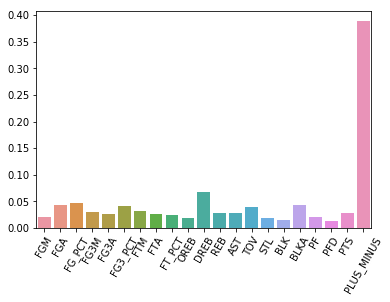

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(playoff_reg_east_features, playoff_reg_east['PLAYOFFS'], test_size=0.30, random_state=19)
print("Logistic Model East Regular Stats ")
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
print(classification_report(y_test,predictions))

print("Random Forest Model East Regular Stats ")
regular_rf = RandomForestClassifier(n_estimators=100)
regular_rf.fit(X_train,y_train)
predictions = regular_rf.predict(X_test)
print(classification_report(y_test,predictions))
feature_weights = regular_rf.feature_importances_
bar_plot = sns.barplot(x=r_features,y=feature_weights)
ticks = plt.xticks(rotation=60)

Logistic Model West Regular Stats 
             precision    recall  f1-score   support

          0       0.90      0.84      0.87        44
          1       0.88      0.93      0.90        54

avg / total       0.89      0.89      0.89        98

Random Forest West Regular Stats 
             precision    recall  f1-score   support

          0       0.97      0.86      0.92        44
          1       0.90      0.98      0.94        54

avg / total       0.93      0.93      0.93        98



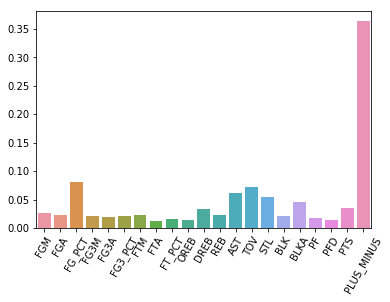

In [51]:
X_train, X_test, y_train, y_test = train_test_split(playoff_reg_west_features, playoff_reg_west['PLAYOFFS'], test_size=0.30, random_state=19)
print("Logistic Model West Regular Stats ")
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
print(classification_report(y_test,predictions))

print("Random Forest West Regular Stats ")
regular_rf = RandomForestClassifier(n_estimators=100)
regular_rf.fit(X_train,y_train)
predictions = regular_rf.predict(X_test)
print(classification_report(y_test,predictions))
feature_weights = regular_rf.feature_importances_
bar_plot = sns.barplot(x=r_features,y=feature_weights)
ticks = plt.xticks(rotation=60)

Logistic Model East Adv Stats 
             precision    recall  f1-score   support

          0       0.87      0.96      0.91        48
          1       0.96      0.86      0.91        51

avg / total       0.91      0.91      0.91        99

Random Forest East Adv Stats 
             precision    recall  f1-score   support

          0       0.90      0.96      0.93        48
          1       0.96      0.90      0.93        51

avg / total       0.93      0.93      0.93        99



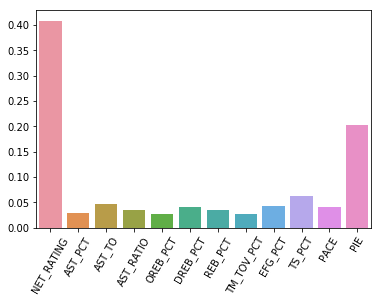

In [50]:
X_train, X_test, y_train, y_test = train_test_split(playoff_adv_east_features, playoff_adv_east['PLAYOFFS'], test_size=0.30, random_state=19)
print("Logistic Model East Adv Stats ")
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
print(classification_report(y_test,predictions))

print("Random Forest East Adv Stats ")
regular_rf = RandomForestClassifier(n_estimators=100)
regular_rf.fit(X_train,y_train)
predictions = regular_rf.predict(X_test)
print(classification_report(y_test,predictions))
feature_weights = regular_rf.feature_importances_
bar_plot = sns.barplot(x=a_features,y=feature_weights)
ticks = plt.xticks(rotation=60)

Logistic Model West Adv Stats 
             precision    recall  f1-score   support

          0       0.95      0.84      0.89        44
          1       0.88      0.96      0.92        54

avg / total       0.91      0.91      0.91        98

Random Forest West Adv Stats 
             precision    recall  f1-score   support

          0       0.95      0.86      0.90        44
          1       0.90      0.96      0.93        54

avg / total       0.92      0.92      0.92        98



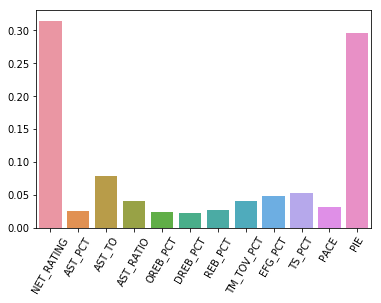

In [46]:
X_train, X_test, y_train, y_test = train_test_split(playoff_adv_west_features, playoff_adv_west['PLAYOFFS'], test_size=0.30, random_state=19)
print("Logistic Model West Adv Stats ")
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
print(classification_report(y_test,predictions))

print("Random Forest West Adv Stats ")
regular_rf = RandomForestClassifier(n_estimators=100)
regular_rf.fit(X_train,y_train)
predictions = regular_rf.predict(X_test)
print(classification_report(y_test,predictions))

feature_weights = regular_rf.feature_importances_
bar_plot = sns.barplot(x=a_features,y=feature_weights)
ticks = plt.xticks(rotation=60)

Random Forest Model East Regular Stats 
             precision    recall  f1-score   support

          0       0.73      0.73      0.73        48
          1       0.75      0.75      0.75        51

avg / total       0.74      0.74      0.74        99



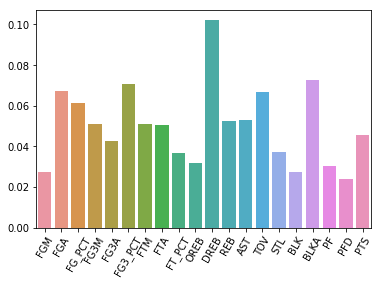

In [53]:
playoff_reg_east_features = playoff_reg_east[r_features_no_plusminus]

X_train, X_test, y_train, y_test = train_test_split(playoff_reg_east_features, playoff_reg_east['PLAYOFFS'], test_size=0.30, random_state=19)
print("Random Forest Model East Regular Stats ")
regular_rf = RandomForestClassifier(n_estimators=100)
regular_rf.fit(X_train,y_train)
predictions = regular_rf.predict(X_test)
print(classification_report(y_test,predictions))
feature_weights = regular_rf.feature_importances_
bar_plot = sns.barplot(x=r_features_no_plusminus,y=feature_weights)
ticks = plt.xticks(rotation=60)